In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns

#%env HDF5_USE_FILE_LOCKING=FALSE
    
import sys
sys.path.insert(1, '../../models/PFN')
from dataset_pfn import PFNDataset

In [2]:
#Training/Testing path
preprocessed=True
dataset=''
if dataset == '':
    train_path = "../../datasets/train.h5"
    val_path = "../../datasets/val.h5"
    test_path = "../../datasets/test.h5"

#Loading training/testing dataset
train_set = PFNDataset(train_path, preprocessed)
#val_set = PFNDataset(val_path, preprocessed)
#test_set = PFNDataset(test_path, preprocessed)
train_data, _, train_label = train_set[:]
#val_data, _, val_label = val_set[:]
#test_data, _, test_label = test_set[:]
sig_train = train_data[train_label[:,1]==1]
#sig_val = val_data[val_label[:,1]==1]
#sig_test = test_data[test_label[:,1]==1]
bkg_train = train_data[train_label[:,1]==0]
#bkg_val = val_data[val_label[:,1]==0]
#bkg_test = test_data[test_label[:,1]==0]

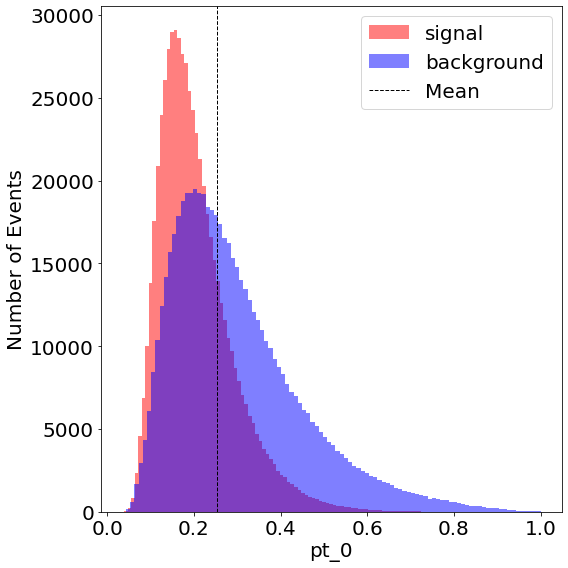

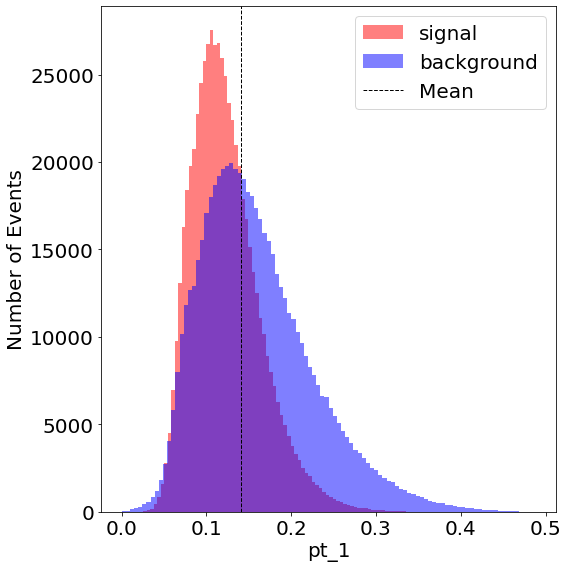

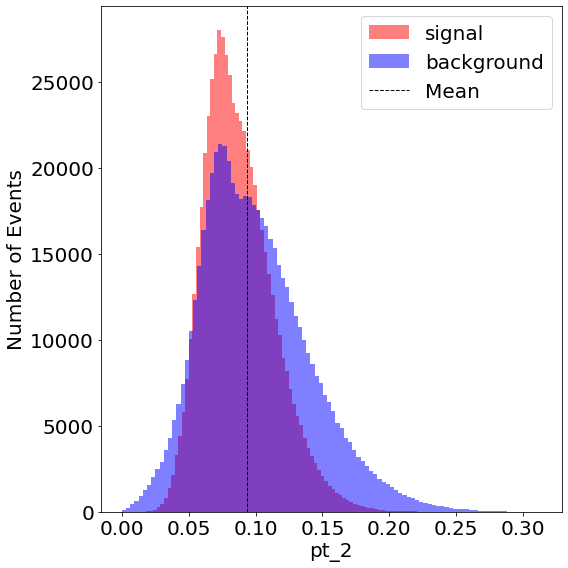

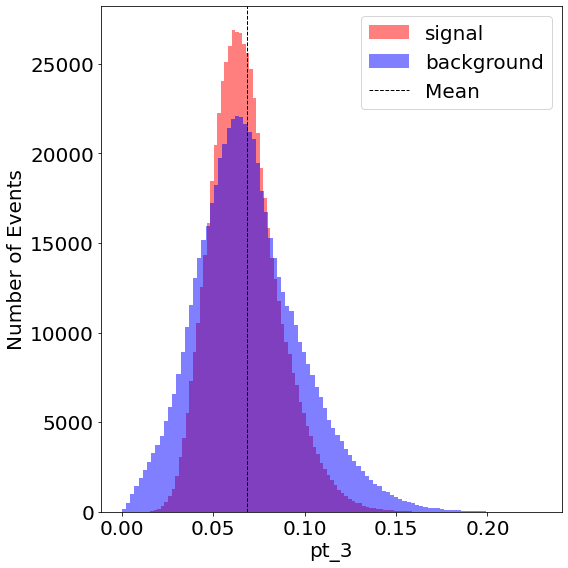

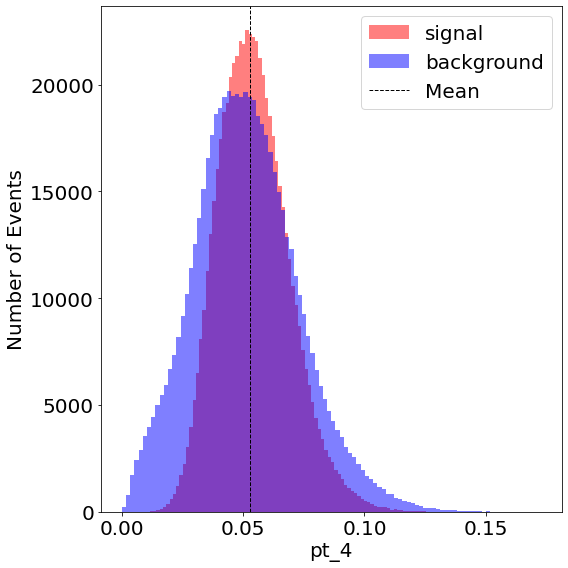

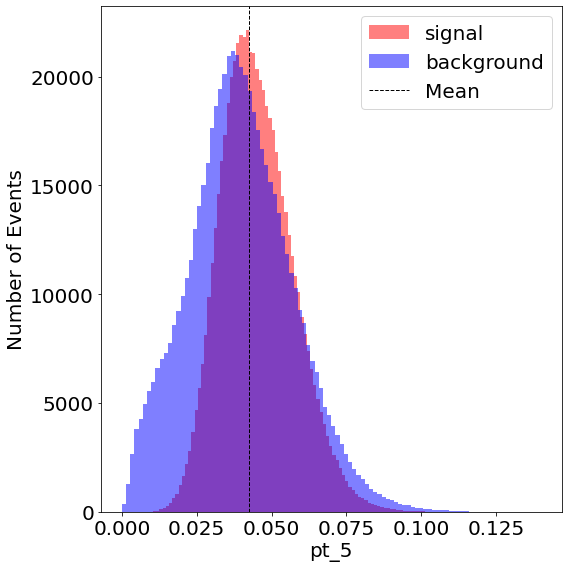

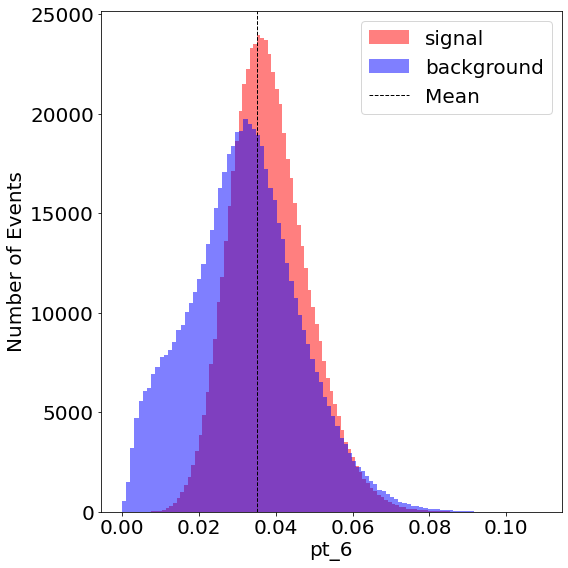

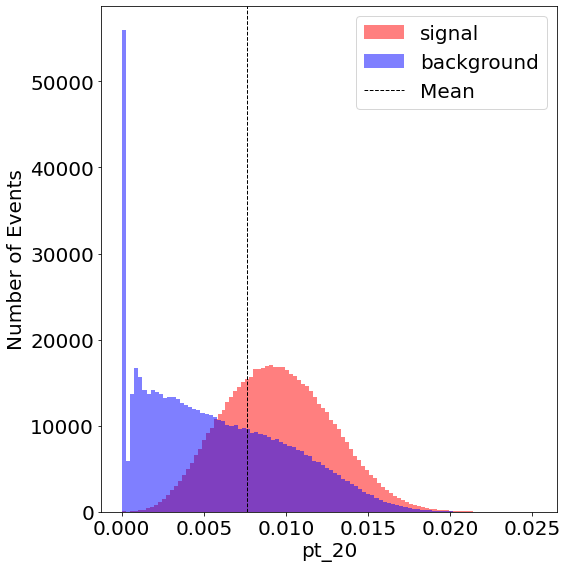

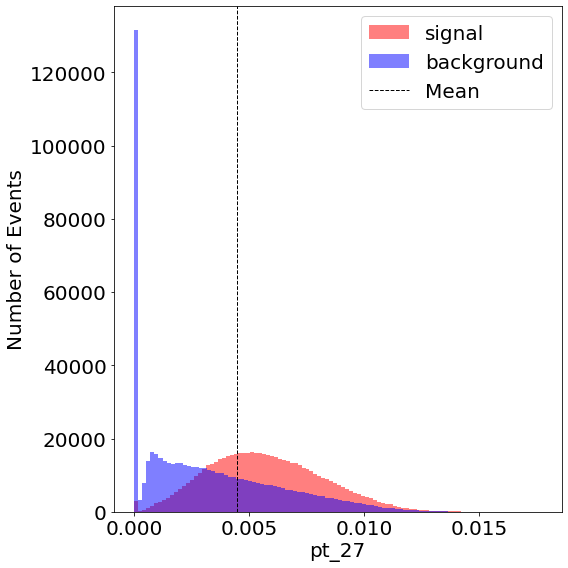

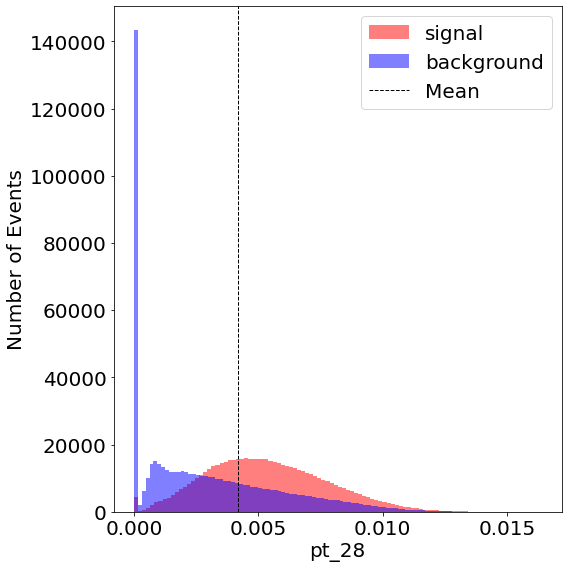

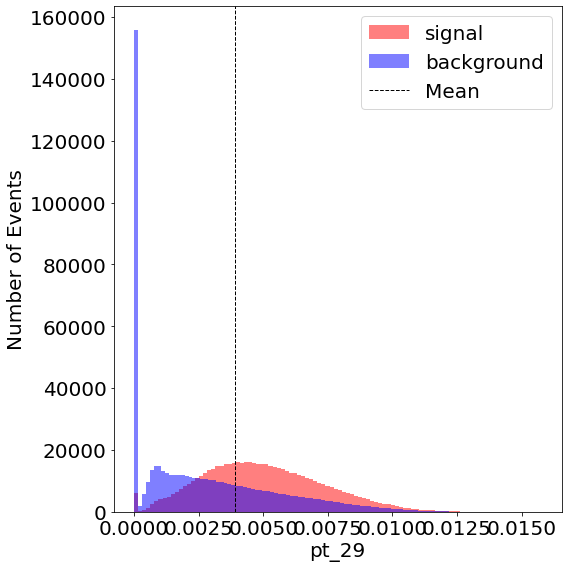

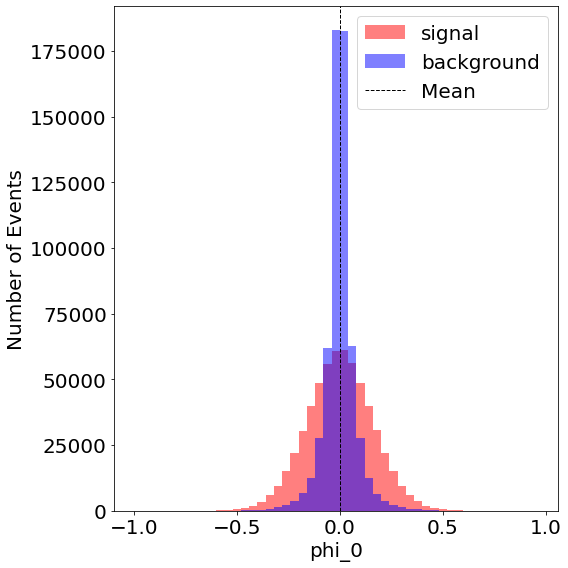

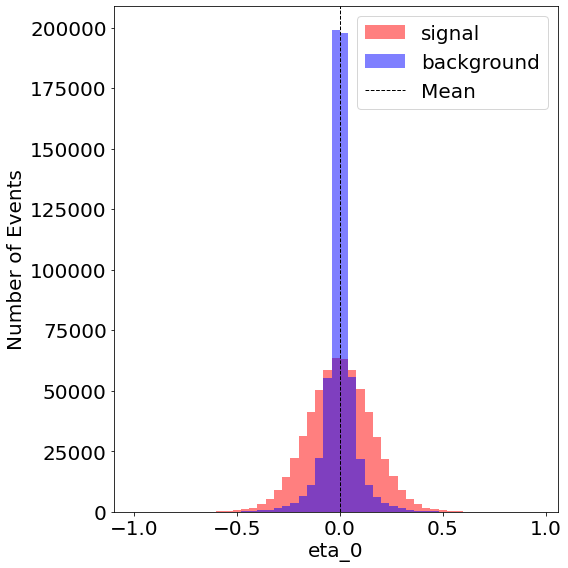

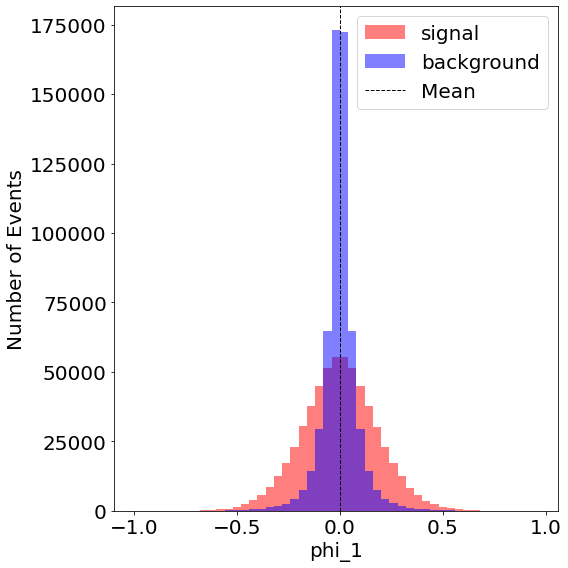

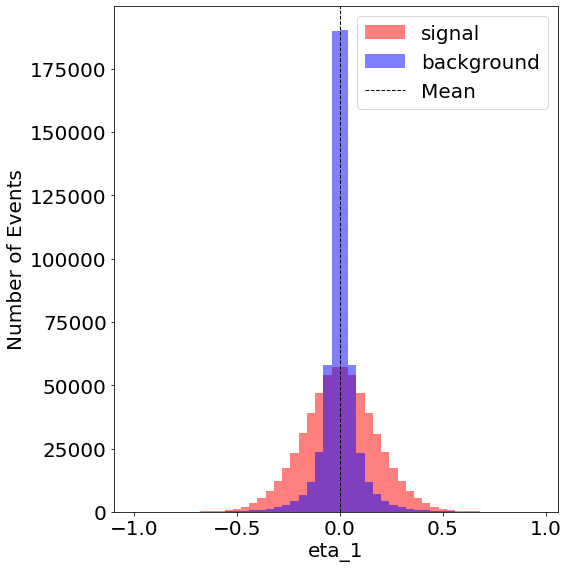

In [3]:
#Train feature distribtuions
#labels = ['pt_0', 'eta_0', 'phi_0', 'pt_1', 'eta_1', 'phi_1', 'pt_2', 'eta_2', 'phi_2']
labels = ['pt_0', 'pt_1', 'pt_2', 'pt_3', 'pt_4', 'pt_5', 'pt_6', 'pt_20', 'pt_27', 'pt_28', 'pt_29',  
          'phi_0', 'eta_0', 'phi_1', 'eta_1',]
rows = []
cols = []
means = []
for label in labels:
    rows.append(int(label.split('_')[1]))
    if 'pt' in label:
        cols.append(0)
    if 'eta' in label:
        cols.append(1)
    if 'phi' in label:
        cols.append(2)                



plt.style.use('seaborn-deep')
nrows = 3
ncols = int((len(labels)-0.1)/nrows) + 1
#f, a = plt.subplots(nrows, ncols, constrained_layout=True, figsize=(5*nrows,5*ncols))
#f.suptitle('Training PFN Feature Distributions', fontsize=16)
#a = a.ravel()
for idx, label in enumerate(labels):
    bins = 100
    row = rows[idx]
    col = cols[idx]
    #ax.axes.yaxis.set_ticklabels([])
    
    sigvals = sig_train[:, row][:, col].numpy()
    bkgvals = bkg_train[:, row][:, col].numpy()
    mean = np.append(sigvals, bkgvals).mean()
    means.append(mean)
    if 'phi' in label or 'eta' in label:
        bins = np.arange(-1,1,4/100)
    plt.figure(figsize=(8,8))
    plt.hist(sigvals, bins=bins, alpha=0.5, label = 'signal', color = 'red')
    plt.hist(bkgvals, bins=bins, alpha=0.5, label = 'background', color= 'blue')
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label = 'Mean')
    #plt.set_title(labels[idx])
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(loc='upper right', fontsize = 20)
    plt.xlabel(label, fontsize=20)
    plt.ylabel("Number of Events", fontsize = 20)
    
    #Saves feature distribution
    plt.tight_layout()
    plt.savefig('figures/feature_histograms/{}.pdf'.format(label), dpi = 150)

In [4]:
feats = []
for ii in range(200):
    feats += ['{}_{}'.format(f, ii) for f in ['pt', 'eta', 'phi']]

In [20]:
feats2check = []
for ii in range(30):
    feats2check += ['{}_{}'.format(f, ii) for f in ['pt', 'eta', 'phi']]


In [21]:
bkg_in = torch.flatten(bkg_train, start_dim=1, end_dim=2).numpy()
bkg_in = pd.DataFrame(bkg_in, columns = feats)[feats2check]

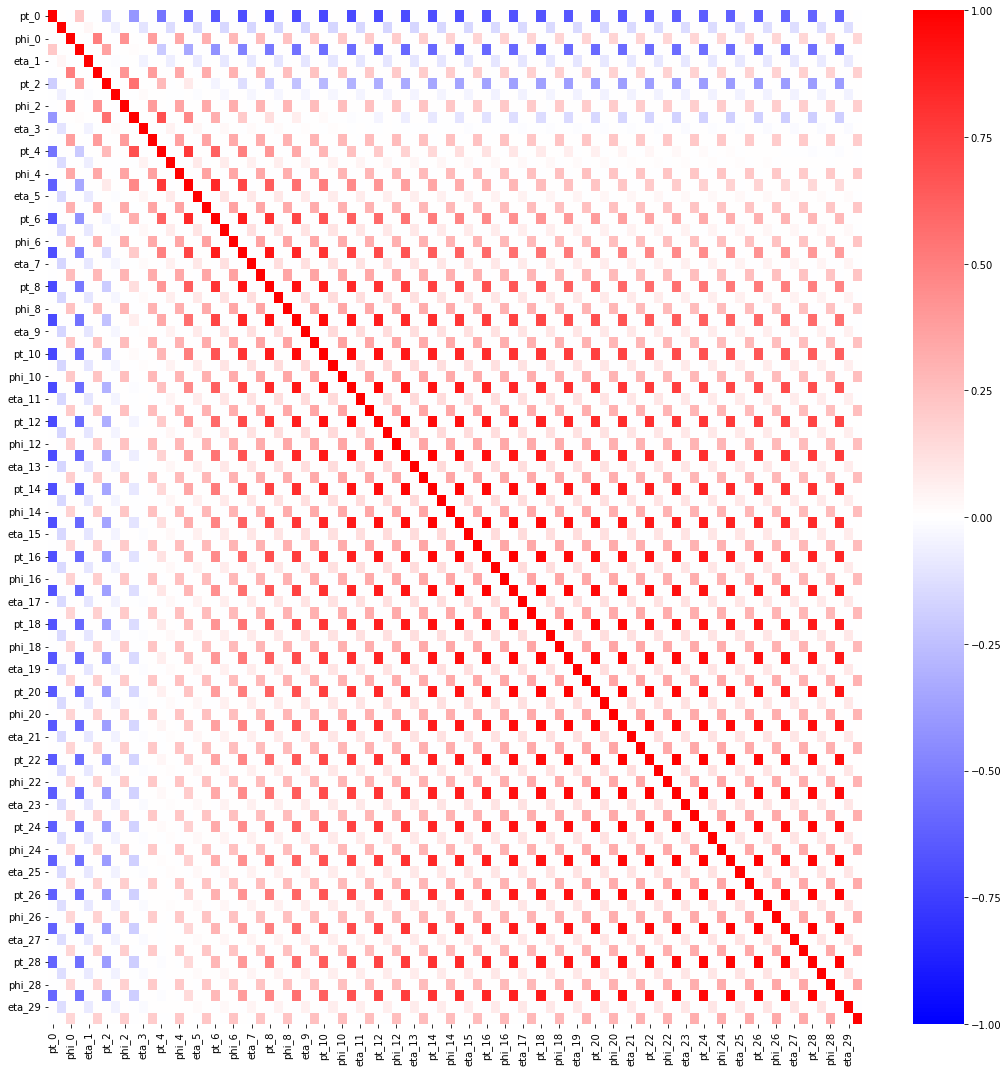

In [22]:

bkg_corrmat = bkg_in.corr()

plt.figure(idx, figsize=(15,15))
# sorted_ = sig_corrmat.abs().sum(0).sort_values(ascending=False).keys()
#sorted_ = sig_corrmat.columns
#bkg_corrmat = bkg_corrmat.loc[labels, labels]
sns.heatmap(bkg_corrmat, center=0, annot=False, cmap='bwr', fmt='.1f',vmin= -1., vmax = 1.)
plt.tight_layout()
#plt.savefig("figures/LatentSpaceFeatCorr_PFN_baseline_sig.pdf")

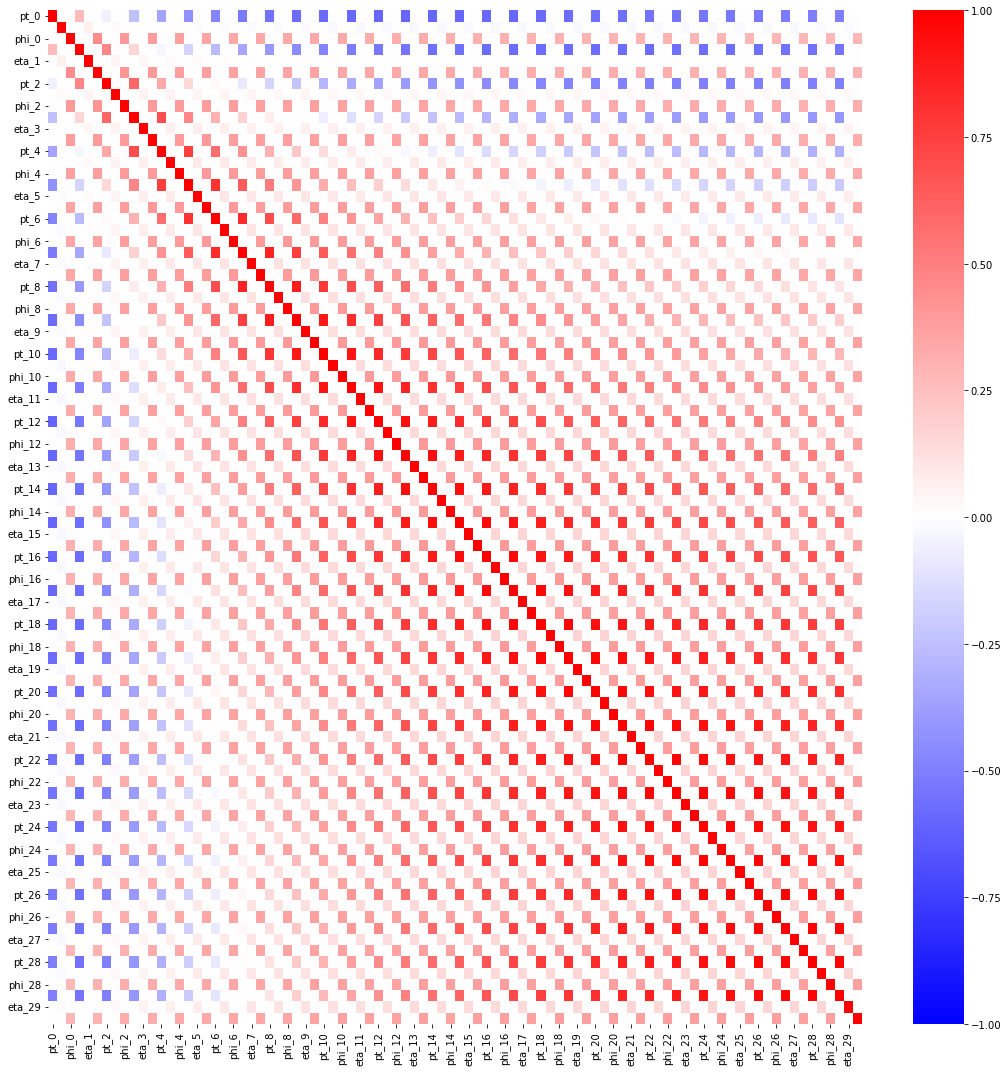

In [23]:
sig_in = torch.flatten(sig_train, start_dim=1, end_dim=2).numpy()
sig_in = pd.DataFrame(sig_in, columns = feats)[feats2check]

sig_corrmat = sig_in.corr()

plt.figure(idx, figsize=(15,15))
# sorted_ = sig_corrmat.abs().sum(0).sort_values(ascending=False).keys()
#sorted_ = sig_corrmat.columns
#bkg_corrmat = bkg_corrmat.loc[labels, labels]
sns.heatmap(sig_corrmat, center=0, annot=False, cmap='bwr', fmt='.1f',vmin= -1., vmax = 1.)
plt.tight_layout()
#plt.savefig("figures/LatentSpaceFeatCorr_PFN_baseline_sig.pdf")